
# **Exploring Temporal Patterns: A Comprehensive Time Series Analysis of Rain in Australia**

Hello and welcome! This notebook is dedicated to conducting a Time Series Analysis of the Rain in Australia dataset, which is conveniently accessible at https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package."

A time series is a series of data points or observations collected or recorded in a sequential and chronological order over time. These observations are often taken at regular intervals, such as hourly, daily, monthly, or yearly, and can be used to analyze patterns, trends, and behaviors that evolve over time. Time series data is common in various fields, including finance, economics, weather forecasting, signal processing, and many others.

In time series analysis, the temporal ordering of data points is crucial, as the relationships and dependencies between observations can provide valuable insights. Time series modeling involves understanding and representing the underlying patterns, seasonality, trends, and potentially forecasting future values based on historical data. Various statistical and machine learning techniques, such as Autoregressive Integrated Moving Average (ARIMA), Exponential Smoothing State Space Models (ETS), and machine learning algorithms, are commonly employed for time series analysis and prediction.

In [4]:
# Install required packages
install.packages("ggplot2")
install.packages("tseries")
install.packages("forecast")

# Load necessary libraries
library(forecast)
library(tseries)
library(ggplot2)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Load the dataset
weatherAUS = read.csv("/content/sample_data/weatherAUS.csv")

str(weatherAUS)

'data.frame':	145460 obs. of  23 variables:
 $ Date         : chr  "2008-12-01" "2008-12-02" "2008-12-03" "2008-12-04" ...
 $ Location     : chr  "Albury" "Albury" "Albury" "Albury" ...
 $ MinTemp      : num  13.4 7.4 12.9 9.2 17.5 14.6 14.3 7.7 9.7 13.1 ...
 $ MaxTemp      : num  22.9 25.1 25.7 28 32.3 29.7 25 26.7 31.9 30.1 ...
 $ Rainfall     : num  0.6 0 0 0 1 0.2 0 0 0 1.4 ...
 $ Evaporation  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Sunshine     : num  NA NA NA NA NA NA NA NA NA NA ...
 $ WindGustDir  : chr  "W" "WNW" "WSW" "NE" ...
 $ WindGustSpeed: int  44 44 46 24 41 56 50 35 80 28 ...
 $ WindDir9am   : chr  "W" "NNW" "W" "SE" ...
 $ WindDir3pm   : chr  "WNW" "WSW" "WSW" "E" ...
 $ WindSpeed9am : int  20 4 19 11 7 19 20 6 7 15 ...
 $ WindSpeed3pm : int  24 22 26 9 20 24 24 17 28 11 ...
 $ Humidity9am  : int  71 44 38 45 82 55 49 48 42 58 ...
 $ Humidity3pm  : int  22 25 30 16 33 23 19 19 9 27 ...
 $ Pressure9am  : num  1008 1011 1008 1018 1011 ...
 $ Pressure3pm  : num  1007


The provided R code conducts a comprehensive analysis of rainfall data, focusing on the 'RainToday' and 'RainTomorrow' columns for various locations. Here's a breakdown of the code and its results:


**RainToday Analysis:** The code aggregates the count of "Yes" values for the 'RainToday' column across different locations.
It identifies the location with the highest count of "Yes" values in the 'RainToday' column (in this case, Portland) and prints the location along with the count.

**RainTomorrow Analysis:** Similarly, the code aggregates the count of "Yes" values for the 'RainTomorrow' column across different locations.
It identifies the location with the highest count of "Yes" values in the 'RainTomorrow' column (again, Portland) and prints the location along with the count.
**Top 10 Locations by Mean Humidity3pm:** The code filters the dataset to include only instances where rain is forecasted for tomorrow ('RainTomorrow' equals "Yes"). It calculates the mean 'Humidity3pm' for each location and selects the top 10 locations with the highest mean humidity.
The resulting data is visualized using a bar chart with the locations sorted by mean humidity.

**Results:**

The analysis reveals that Portland has the most "Yes" values in both 'RainToday' (1094) and 'RainTomorrow' (1095) columns, indicating a high frequency of rainy weather.
The bar chart depicts the top 10 locations with the highest mean humidity at 3 p.m., with Portland prominently leading the list.


Location with the most 'Yes' values in RainToday column: Portland 
Count of 'Yes' values in that location: 1094 
Location with the most 'Yes' values in RainTomorrow column: Portland 
Count of 'Yes' values in that location: 1095 


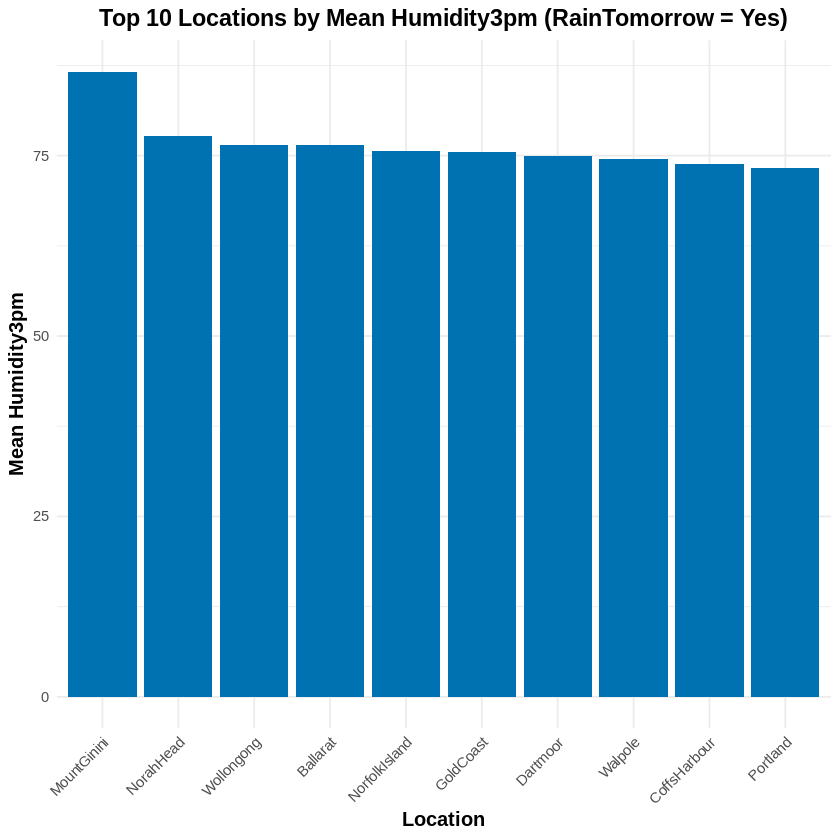

In [5]:
# Group by Location and RainToday, and calculate the count of "Yes" values
rain_today_counts <- aggregate(RainToday ~ Location, data = weatherAUS, FUN = function(x) sum(x == "Yes"))

# Find the location with the most "Yes" values in RainToday column
location_most_rain_today <- rain_today_counts[which.max(rain_today_counts$RainToday), "Location"]
most_rain_today_count <- rain_today_counts[which.max(rain_today_counts$RainToday), "RainToday"]

cat("Location with the most 'Yes' values in RainToday column:", location_most_rain_today, "\n")
cat("Count of 'Yes' values in that location:", most_rain_today_count, "\n")


# Group by Location and RainTomorrow, and calculate the count of "Yes" values
rain_tomorrow_counts <- aggregate(RainTomorrow ~ Location, data = weatherAUS, FUN = function(x) sum(x == "Yes"))

# Find the location with the most "Yes" values in RainTomorrow column
location_most_rain_tomorrow <- rain_tomorrow_counts[which.max(rain_tomorrow_counts$RainTomorrow), "Location"]
most_rain_tomorrow_count <- rain_tomorrow_counts[which.max(rain_tomorrow_counts$RainTomorrow), "RainTomorrow"]

cat("Location with the most 'Yes' values in RainTomorrow column:", location_most_rain_tomorrow, "\n")
cat("Count of 'Yes' values in that location:", most_rain_tomorrow_count, "\n")


# filter data for "Yes" (rain) outcomes
rain_data <- subset(weatherAUS, RainTomorrow == "Yes")

# Get the top 10 locations by mean Humidity3pm
top_10_locations <- head(sort(tapply(rain_data$Humidity3pm, rain_data$Location, mean, na.rm = TRUE), decreasing = TRUE), 10)

top_10_data <- data.frame(Location = names(top_10_locations), Mean_Humidity_3pm = top_10_locations)

ggplot(top_10_data, aes(x = reorder(Location, -Mean_Humidity_3pm), y = Mean_Humidity_3pm)) +
  geom_bar(stat = "identity", fill = "#0072B2") +
  labs(title = "Top 10 Locations by Mean Humidity3pm (RainTomorrow = Yes)",
       x = "Location", y = "Mean Humidity3pm") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
        axis.title = element_text(size = 12, face = "bold"))

In this analysis, we focused on the 'Portland' location within the Rain in Australia dataset. Firstly, we filtered the data specifically for Portland, ensuring a more granular examination of the weather patterns in this area. Subsequently, we transformed the 'Date' column into a proper date format, allowing for a more systematic temporal analysis. Extracting the month and year information facilitated the grouping of data by month-year combinations. This grouping strategy enabled the calculation of the monthly mean Humidity3pm for Portland, providing insights into the variations and trends in humidity levels over time. The resulting dataset, 'monthly_mean_Humidity3pm,' is essential for understanding the broader atmospheric conditions in Portland, contributing valuable information for further time series analysis and forecasting endeavors.

In [8]:
# Filter data for the 'Portland' location
Portland_data <- subset(weatherAUS, Location == "Portland")

# Convert 'Date' column to a proper date format
Portland_data$Date <- as.Date(Portland_data$Date)

# Extract the month and year from the 'Date' column
Portland_data$Month <- format(Portland_data$Date, "%m")
Portland_data$Year <- format(Portland_data$Date, "%Y")

# Combine 'Month' and 'Year' into a single column
Portland_data$MonthYear <- paste(Portland_data$Year, Portland_data$Month, sep = "-")

# Group by month-year and calculate the monthly mean Humidity3pm
monthly_mean_Humidity3pm <- Portland_data %>%
  group_by(MonthYear) %>%
  summarise(MonthlyMeanHumidity3pm = mean(Humidity3pm, na.rm = TRUE))

print(monthly_mean_Humidity3pm)

# A tibble: 99 × 2
   MonthYear MonthlyMeanHumidity3pm
   <chr>                      <dbl>
 1 2009-01                     53.2
 2 2009-02                     60.5
 3 2009-03                     62.9
 4 2009-04                     61.6
 5 2009-05                     72.6
 6 2009-06                     74.0
 7 2009-07                     71.9
 8 2009-08                     67.3
 9 2009-09                     62.7
10 2009-10                     63.8
# ℹ 89 more rows



In this section, we transformed the monthly mean Humidity3pm data for Portland into a time series object, naming it 'rain_ts_MeanHumidity3pm.' The time series begins in April 2008 and is structured with a monthly frequency of 12. The subsequent plot visualizes the time series data, displaying the patterns and variations in mean humidity levels at 3 p.m. over the specified time period. The overlaid line enhances the representation, allowing for a more detailed observation of trends and fluctuations in Portland's monthly mean humidity. This graphical representation serves as a crucial tool for time series analysis, aiding in the identification of potential seasonality, trends, and patterns, which are fundamental aspects for making informed predictions about future humidity conditions in Portland.

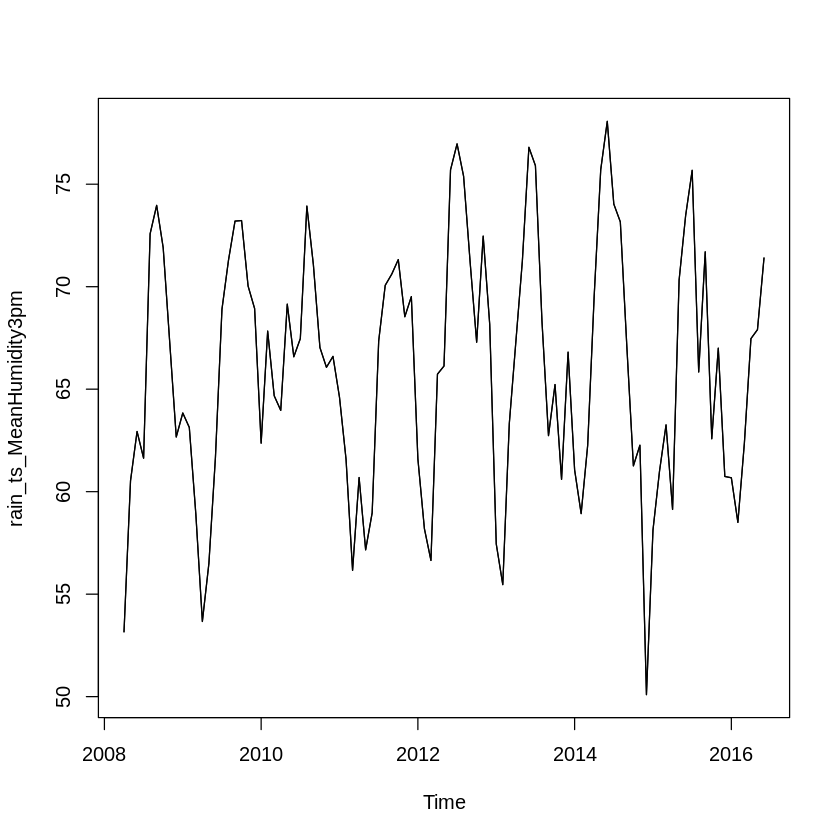

In [9]:
# Create a time series object 'monthly_mean_Humidity3pm' with the monthly mean Humidity3pm data
rain_ts_MeanHumidity3pm <- ts(monthly_mean_Humidity3pm$MonthlyMeanHumidity3pm, start = c(2008, 4), frequency = 12)

# Plot the time series data itself
plot(rain_ts_MeanHumidity3pm)

lines(rain_ts_MeanHumidity3pm)



In the below code, we conducted the **Augmented Dickey-Fuller (ADF)** test on the time series data 'rain_ts_MeanHumidity3pm' to assess its stationarity. The ADF test is a common statistical method used to determine whether a time series data set exhibits a stationary behavior, which is crucial for accurate time series modeling.

The test result indicates a Dickey-Fuller statistic of -6.9579, calculated with a lag order of 4. The p-value associated with the test is 0.01, which is smaller than the commonly used significance level of 0.05. As the p-value is below the significance threshold, we reject the null hypothesis, suggesting that the time series data is stationary.

A stationary time series is characterized by constant statistical properties over time, making it easier to model and analyze. The significant p-value in this case supports the idea that the mean humidity levels at 3 p.m. in Portland exhibit stationary behavior, providing a solid foundation for further time series analysis and forecasting

In [13]:


# Perform the Augmented Dickey-Fuller test
adf_result <- adf.test(rain_ts_MeanHumidity3pm)

print(adf_result)


Warning message in adf.test(rain_ts_MeanHumidity3pm):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  rain_ts_MeanHumidity3pm
Dickey-Fuller = -6.9579, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



**AutoRegressive Integrated Moving Average (ARIMA)** is a popular time series analysis and forecasting method that combines three key components: AutoRegressive (AR), Integrated (I), and Moving Average (MA). Here's an explanation of each component:

**AutoRegressive (AR):** The AR component refers to the autoregressive part of the model, which involves predicting the future values based on past values in the time series.It assumes that the future value is a linear combination of its own past values, allowing the model to capture dependencies and patterns within the data.

**Integrated (I):** The Integrated component represents differencing, denoted by the 'I' in ARIMA. Differencing involves subtracting the current value from the previous one, aiming to make the time series stationary. Stationarity is crucial for ARIMA models, as they work best when applied to data with a constant mean and variance.

**Moving Average (MA):** The MA component deals with the error term by modeling the relationship between the current observation and a residual term from a moving average process applied to lagged observations.
It captures short-term fluctuations and noise in the data, helping to smooth out irregularities.


In summary, ARIMA is characterized by three parameters: p, d, and q, representing the AR order, the degree of differencing, and the MA order, respectively. The ARIMA model aims to find the optimal values for these parameters to best represent the underlying patterns in the time series data.

The modeling process typically involves:

* Identifying the order of differencing needed to achieve stationarity.
* Identifying the orders of autoregressive and moving average components by analyzing autocorrelation and partial autocorrelation plots.
* Fitting the ARIMA model to the data using these identified parameters.
* Evaluating the model's performance and making forecasts.

ARIMA models are widely used for forecasting in various fields, including economics, finance, and meteorology, where time-dependent patterns are crucial for making accurate predictions.



In this code snippet, an ARIMA (AutoRegressive Integrated Moving Average) model is fitted to the time series data rain_ts_MeanHumidity3pm using the auto.arima function, which automatically selects the optimal parameters for the model. The autocorrelation and partial autocorrelation of the model residuals are then plotted to assess the goodness of fit and identify any remaining patterns in the residuals.

The acf function is used to plot the autocorrelation of the model residuals, showing the correlation between the residuals at different lags. Similarly, the pacf function is used to plot the partial autocorrelation, which provides insights into the direct relationships between the residuals at different lags while controlling for intermediate values. We observe that the model has captured the predominant patterns within the data. Moreover, all the lag errors remain comfortably within the upper and lower limits, indicating the stability of the model.

Finally, forecasts for the next 8 years (8 * 12 months) are generated using the forecast function, and the forecasted values are visualized using the plot function. This plot provides a visual representation of the predicted values along with confidence intervals.

Analyzing these plots helps in validating the model assumptions and understanding the temporal dependencies in the residuals, ultimately aiding in the assessment of the model's predictive performance.


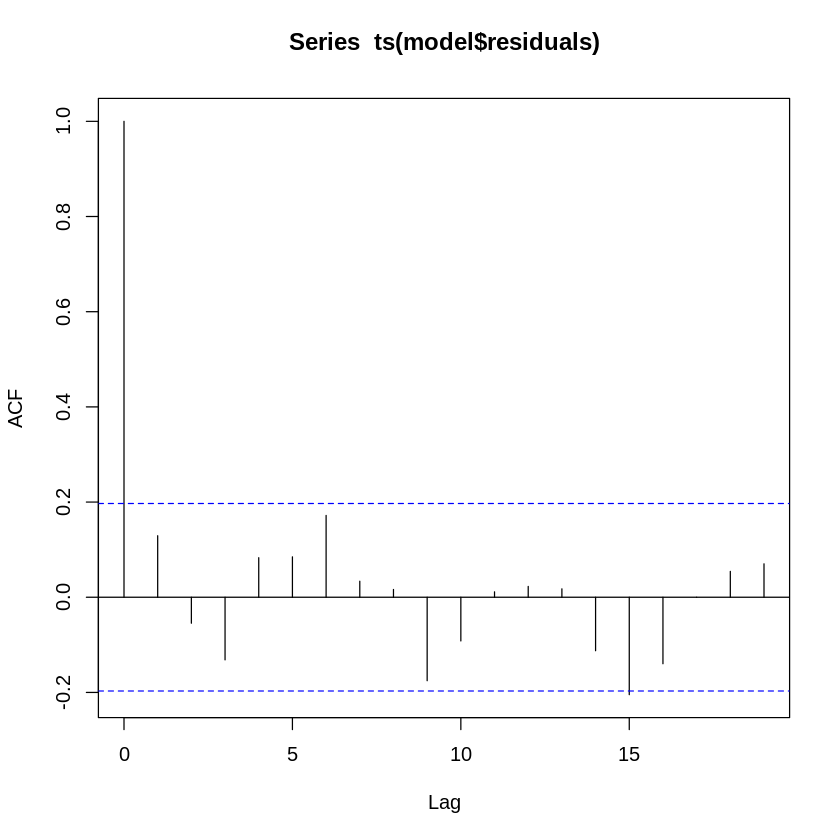

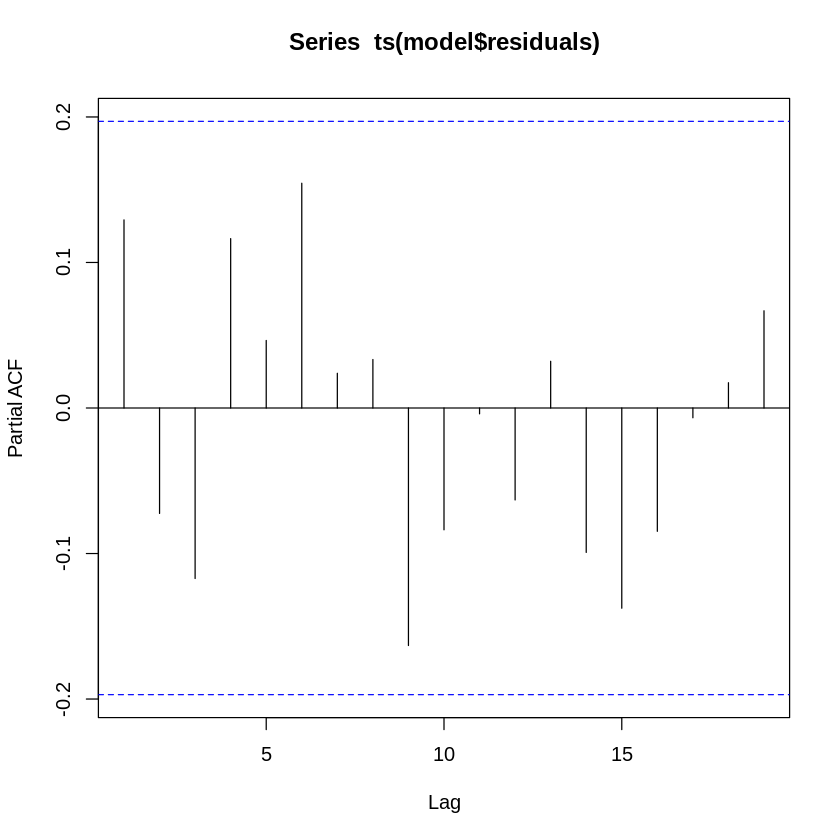

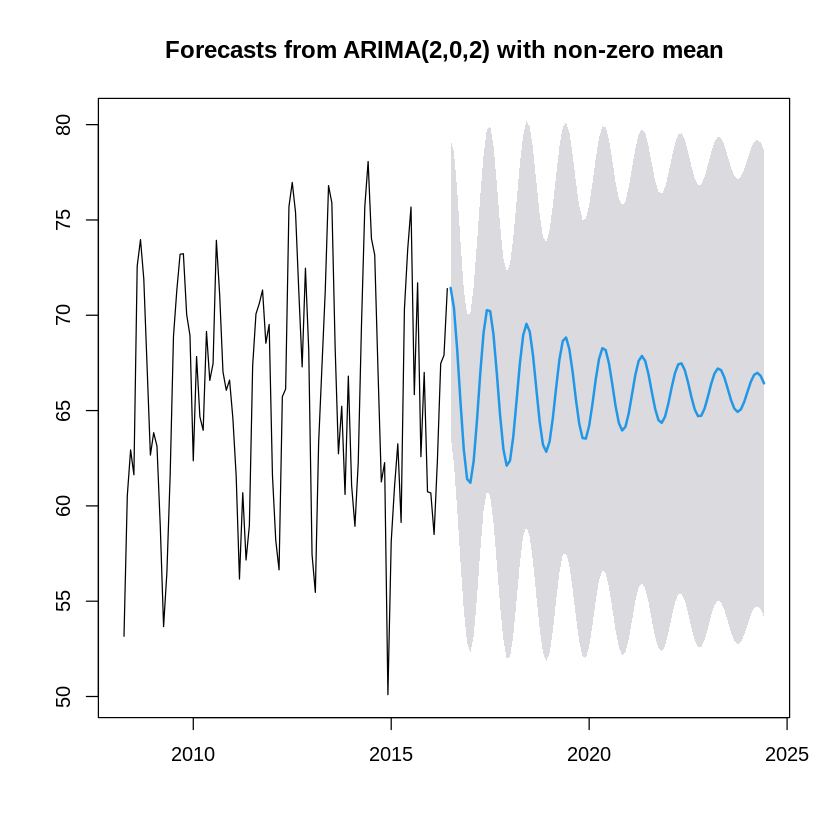

In [17]:
# Fit an ARIMA model to the time series data rain_ts_MeanHumidity3pm
model <- auto.arima(rain_ts_MeanHumidity3pm)

# Plot the autocorrelation of the model residuals
acf(ts(model$residuals))

# Plot the partial autocorrelation of the model residuals
pacf(ts(model$residuals))

# Generate forecasts from the ARIMA model for 8 years (8*12 months)
ts.forecast <- forecast(model, level = c(95), h = 8 * 12)

# Plot the forecasted values
plot(ts.forecast)

Below code  summarizes the ARIMA Model, which utilizes historical data to forecast future values of the 'Humidity3pm' variable (mean humidity of each month as we get a subset of data). The equation for 'Humidity3pm' over the period from 2008 to 2016 can be expressed as follows:


**Hmidity3pm (t) =66.0120+1.6838⋅ Hmidity3pm (t−1)−0.9636⋅ Hmidity3pm (t−2) −1.3585⋅ε (t−1)+0.6537⋅ε (t−2)+ε (t)**


This equation describes how the current 'Humidity3pm' value (Humidity3pm (t)) is forecasted based on its previous values at time t−1 and t−2, as well as the lagged error terms ε (t−1) and ε (t−2). The constant term 66.0120 is also included in the model. As a result of this equation, we can predict future humidity values based on historical data representing the temporal patterns and dependencies observed in Humidity3pm data between 2008 and 2016.


In [28]:
summary(model)

Series: rain_ts_MeanHumidity3pm 
ARIMA(2,0,2) with non-zero mean 

Coefficients:
         ar1      ar2      ma1     ma2     mean
      1.6838  -0.9636  -1.3585  0.6537  66.0120
s.e.  0.0358   0.0378   0.1580  0.1608   0.4141

sigma^2 = 15.7:  log likelihood = -275.42
AIC=562.83   AICc=563.75   BIC=578.41

Training set error measures:
                      ME     RMSE      MAE        MPE     MAPE      MASE
Training set -0.01294065 3.860544 3.038744 -0.3786571 4.731357 0.6982353
                  ACF1
Training set 0.1292449

In [18]:
lower_bound <- ts.forecast$lower
print(lower_bound)

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2016                                                       63.67116 62.24495
2017 52.31048 53.19399 55.20418 57.67379 59.76011 60.78881 60.50638 59.09428
2018 52.06011 53.20129 55.04863 57.00354 58.43623 58.92343 58.37823 57.02148
2019 52.26608 53.45989 55.04560 56.52193 57.43633 57.54133 56.85366 55.60850
2020 52.62380 53.75188 55.04601 56.10799 56.62769 56.47987 55.74260 54.64703
2021 52.99702 53.99472 55.00495 55.72579 55.95731 55.65701 54.93551 54.00788
2022 53.32420 54.16287 54.91730 55.36894 55.40022 55.02226 54.35882 53.60161
2023 53.58207 54.25674 54.79301 55.04073 54.94172 54.53957 53.95829 53.36257
2024 53.76755 54.28796 54.64629 54.74622 54.57061 54.18045                  
          Sep      Oct      Nov      Dec
2016 59.81949 57.04395 54.53033 52.81131
2017 57.00790 54.79491 52.97571 51.97807
2018 55.25778 53.54553 52.30290 51.83666
2019 54.16067 52.88615 52.10428 52.01159
2020 53.49736 52.59322 52

In [19]:
upper_bound <- ts.forecast$upper
print(upper_bound)

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2016                                                       79.20148 78.57626
2017 70.11355 71.53263 73.78327 76.26913 78.42095 79.75319 79.92701 78.88124
2018 72.67477 74.06691 75.99150 77.94657 79.46272 80.17304 79.89306 78.70647
2019 74.46883 75.77583 77.38015 78.86532 79.86349 80.12509 79.58710 78.41523
2020 75.76955 76.94337 78.23917 79.31993 79.91247 79.86827 79.21047 78.14209
2021 76.71775 77.73054 78.74123 79.48583 79.77440 79.53834 78.85553 77.93549
2022 77.40188 78.24380 79.00170 79.47706 79.54935 79.20844 78.56166 77.80547
2023 77.88458 78.55938 79.10181 79.37000 79.29825 78.91576 78.34041 77.74472
2024 78.21342 78.73418 79.09981 79.21559 79.05679 78.67603                  
          Sep      Oct      Nov      Dec
2016 76.56320 73.84205 71.37748 70.01100
2017 76.93377 74.72308 72.98087 72.24456
2018 76.98290 75.27416 74.11697 73.83895
2019 76.97442 75.71416 75.01157 75.04727
2020 76.99246 76.11029 75

The Ljung-Box test is employed here to assess the independence of the residuals from the time series forecast. This statistical test examines whether there are significant correlations among the residuals at various lags.

In the output, the test statistic (X-squared) is 5.3052, the degrees of freedom (df) is 5, and the p-value is 0.3798. The null hypothesis for this test is that there is no autocorrelation in the residuals. In this case, the relatively high p-value (0.3798) suggests that there is not enough evidence to reject the null hypothesis. Therefore, the residuals appear to be independent, indicating that the ARIMA model adequately captures the temporal patterns in the data.

In summary, the Ljung-Box test results support the validity of the ARIMA model, indicating that the residuals exhibit no significant autocorrelation, which strengthens the reliability of the model's forecasting capabilities.

In [21]:
# Perform the Ljung-Box test on the residuals of the time series forecast and validate the model
Box.test(ts.forecast$residuals, lag = 5, type = 'Ljung-Box')


	Box-Ljung test

data:  ts.forecast$residuals
X-squared = 5.3052, df = 5, p-value = 0.3798
